In [113]:
import xml.etree.cElementTree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline


Energy, in detector /keV  has 29046.0 values
Energy, from source /keV  has 0.0 values
Energy, in detector /keV
[1.792e+03 1.393e+03 1.019e+03 7.320e+02 5.710e+02 4.470e+02 4.020e+02
 3.890e+02 3.560e+02 3.070e+02 2.800e+02 2.840e+02 2.620e+02 2.750e+02
 2.470e+02 2.390e+02 2.330e+02 2.190e+02 2.190e+02 2.000e+02 2.040e+02
 2.240e+02 1.990e+02 2.290e+02 2.140e+02 2.170e+02 2.270e+02 1.870e+02
 2.280e+02 2.140e+02 2.420e+02 2.040e+02 2.100e+02 2.340e+02 2.700e+02
 2.170e+02 2.500e+02 2.500e+02 2.330e+02 2.600e+02 2.400e+02 2.370e+02
 2.260e+02 2.480e+02 2.480e+02 2.830e+02 2.950e+02 2.750e+02 2.740e+02
 2.790e+02 3.190e+02 3.200e+02 3.240e+02 3.280e+02 3.360e+02 3.350e+02
 3.410e+02 3.520e+02 3.510e+02 3.970e+02 3.840e+02 4.070e+02 4.200e+02
 3.810e+02 4.460e+02 4.630e+02 4.580e+02 4.350e+02 5.360e+02 5.190e+02
 5.360e+02 5.390e+02 4.980e+02 5.350e+02 4.810e+02 4.350e+02 4.400e+02
 3.220e+02 2.200e+02 1.290e+02 5.500e+01 8.000e+00 4.000e+00 1.000e+00
 2.000e+00 0.000e+00 2.000e+00 1.000e

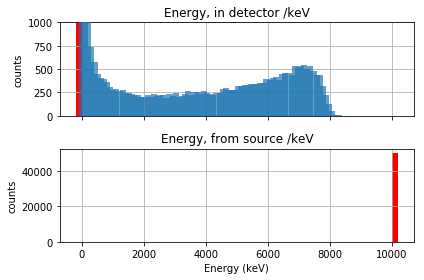

In [201]:
# Get histograms from XML output

filename = 'build/detector_hists.xml'
e = xml.etree.cElementTree.parse(filename).getroot()

hists = dict()
axes  = dict()
underflows = dict()
overflows = dict()
for hist in e.findall('histogram1d'):
    axis_info = hist.findall('axis')[0].attrib
    bin_vals = np.linspace(float(axis_info['min']), float(axis_info['max']), int(axis_info['numberOfBins']))
    title = hist.attrib['title']
    
    cur_hist = np.zeros_like(bin_vals)
    for cell in hist.findall('data1d')[0]:
        try:
            binN=int(cell.attrib['binNum'])
            binH=int(cell.attrib['height'])
            cur_hist[binN] = binH
        except:
            if 'UNDERFLOW' in cell.attrib['binNum']:
                underflows[title] = int(cell.attrib['height'])
            if 'OVERFLOW' in cell.attrib['binNum']:
                overflows[title] = int(cell.attrib['height'])
    hists[title] = cur_hist
    axes[title]  = bin_vals

    print title, " has", np.sum(cur_hist), "values"

    
# ---------- Plot it -------------

key = hists.keys()[0]
print key
print hists[key]
fig, ax = plt.subplots(len(hists.keys()),1, sharex=True)

for k_ind, key in enumerate(hists.keys()):

    ax[k_ind].bar(axes[key], hists[key], width=200, zorder=100, alpha=0.7)
    ax[k_ind].set_title(key)
    ax[k_ind].set_ylabel('counts')
    ax[k_ind].grid('on', zorder=0)
    
    if key in underflows.keys():
        ax[k_ind].bar(axes[key][0] - (axes[key][1]-axes[key][0]), underflows[key], color='r', width=200)
    if key in overflows.keys():
        ax[k_ind].bar(axes[key][-1] + (axes[key][1]-axes[key][0]), overflows[key], color='r', width=200)
#     ax[k_ind].set_xscale('log')
#     ax[k_ind].set_yscale('log')

ax[0].set_ylim([0, 1000])
ax[-1].set_xlabel('Energy (keV)')
fig.tight_layout()

fig.savefig('10MeV_incident_energy.png')

In [132]:
for child in e:
    print child.tag, child.attrib

implementation {'version': '4.2.1', 'package': 'tools'}
histogram1d {'path': '/', 'name': 'h1', 'title': 'Energy, in detector /keV'}
histogram1d {'path': '/', 'name': 'h2', 'title': 'Energy, from source /keV'}


In [59]:
# Load CSV files:

infile = "build/detector_hists_h1_h1.csv"

# np.loadtxt(infile, delimiter=',', skiprows=7)

with open(infile,'r') as file:
    for a in range(10):
        x =file.readline()
        print x

#class tools::histo::h1d

#title Energy, in detector /keV

#dimension 1

#axis fixed 100 1 10000

#annotation axis_x.title 

#bin_number 102

entries,Sw,Sw2,Sxw0,Sx2w0

0,0,0,0,0

0,0,0,0,0

0,0,0,0,0

